In [1]:
import pandas as pd
from pandas import Timestamp
import numpy as np
from datetime import datetime


#to plot within notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import google_sheets_api as sheet #connection to server

In [2]:
#AI Librarys 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [3]:
def getAllSheets():
    sheet_aapl = sheet.AAPL_data.get_all_values() 
    sheet_amzn = sheet.AMZN_data.get_all_values()
    sheet_csco = sheet.CSCO_data.get_all_values()
    sheet_fb = sheet.FB_data.get_all_values()
    sheet_googl = sheet.GOOGL_data.get_all_values()
    sheet_IBM = sheet.IBM_data.get_all_values()
    sheet_intc = sheet.INTC_data.get_all_values()
    sheet_msft = sheet.MSFT_data.get_all_values()
    sheet_orcl = sheet.ORCL_data.get_all_values()
    sheet_qcom = sheet.QCOM_data.get_all_values()
    sheet_tsla = sheet.TSLA_data.get_all_values()
    sheet_vz = sheet.VZ_data.get_all_values()

    sheet_aapl = sheet_aapl[1:] #remove column names title
    sheet_amzn = sheet_amzn[1:] #remove column names title
    sheet_csco = sheet_csco[1:] #remove column names title
    sheet_fb = sheet_fb[1:] #remove column names title
    sheet_googl = sheet_googl[1:] #remove column names title
    sheet_intc = sheet_intc[1:] #remove column names title
    sheet_msft = sheet_msft[1:] #remove column names title
    sheet_IBM = sheet_IBM[1:] #remove column names title
    sheet_orcl = sheet_orcl[1:] #remove column names title
    sheet_qcom = sheet_qcom[1:] #remove column names title
    sheet_tsla = sheet_tsla[1:] #remove column names title
    sheet_vz = sheet_vz[1:] #remove column names title


    
    AAPL_data = pd.DataFrame(sheet_aapl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    AMZN_data = pd.DataFrame(sheet_amzn, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    CSCO_data = pd.DataFrame(sheet_csco, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    FB_data = pd.DataFrame(sheet_fb, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    GOOGL_data = pd.DataFrame(sheet_googl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    INTC_data = pd.DataFrame(sheet_intc, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    MSFT_data = pd.DataFrame(sheet_msft, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    IBM_data = pd.DataFrame(sheet_IBM, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    ORCL_data = pd.DataFrame(sheet_orcl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    QCOM_data = pd.DataFrame(sheet_qcom, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    TSLA_data = pd.DataFrame(sheet_tsla, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    VZ_data = pd.DataFrame(sheet_vz, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 


    return [AAPL_data, AMZN_data, CSCO_data, FB_data, GOOGL_data, INTC_data, MSFT_data, IBM_data, ORCL_data, QCOM_data, TSLA_data, VZ_data]

    
all_stock_data = getAllSheets()  ##THIS VAR HOLDS ALL OF THE STOCK DATA

In [4]:
df_AAPL = all_stock_data[0] #AAPL
df_AMZN = all_stock_data[1] #AMZN
df_CSCO = all_stock_data[2] #CSCO
df_FB = all_stock_data[3] #FB
df_GOOGL = all_stock_data[4] #GOOGL
df_INTC = all_stock_data[5] #INTC
df_MSFT = all_stock_data[6] #MSFT
df_IBM = all_stock_data[7] #IBM
df_ORCL = all_stock_data[8] #ORCL
df_QCOM = all_stock_data[9] #QCOM
df_TLSA = all_stock_data[10] #TSLA
df_VZ = all_stock_data[11] #VZ

all_stock_dataframes = [df_AAPL, df_AMZN, df_CSCO, df_FB, df_GOOGL, df_INTC, df_MSFT, df_IBM, df_ORCL, df_QCOM, df_TLSA, df_VZ]

In [5]:
count = 0

for df in all_stock_dataframes:  
    df['open'] = df['open'].astype(float)
    df['high'] = df['high'].astype(float)
    df['low'] = df['low'].astype(float)
    df['close'] = df['close'].astype(float)
    df['volume'] = df['volume'].astype(int)
    #for index, row in df.iterrows():    
        #if row['timestamp'].endswith('-05:00'):
    #df['timestamp'].iloc[index] = row['timestamp'][:-6]
               
    df.index = df['timestamp']
    print(count, "of ", len(all_stock_dataframes), "stock dataframes successfully reformatted")
    count+=1

print("All data successfully reformatted!")

0 of  12 stock dataframes successfully reformatted
1 of  12 stock dataframes successfully reformatted
2 of  12 stock dataframes successfully reformatted
3 of  12 stock dataframes successfully reformatted
4 of  12 stock dataframes successfully reformatted
5 of  12 stock dataframes successfully reformatted
6 of  12 stock dataframes successfully reformatted
7 of  12 stock dataframes successfully reformatted
8 of  12 stock dataframes successfully reformatted
9 of  12 stock dataframes successfully reformatted
10 of  12 stock dataframes successfully reformatted
11 of  12 stock dataframes successfully reformatted
All data successfully reformatted!


In [6]:
def determine_ticker(ticker):
    if (ticker == 'AAPL'):
        return df_AAPL
    if (ticker == 'AMZN'):
        return df_AMZN
    if (ticker == 'CSCO'):
        return df_CSCO
    if (ticker == 'FB'):
        return df_FB
    if (ticker == 'GOOGL'):
        return df_GOOGL
    if (ticker == 'INTC'):
        return df_INTC
    if (ticker == 'MSFT'):
        return df_MSFT
    if (ticker == 'IBM'):
        return df_IBM
    if (ticker == 'ORCL'):
        return df_ORCL
    if (ticker == 'QCOM'):
        return df_QCOM
    if (ticker == 'TLSA'):
        return df_TLSA
    if (ticker == 'VZ'):
        return df_VZ

In [7]:
def split_by_day(df):
    day_splits = [0]
    #print(df['tradingDay'])
    iterator_day = df['tradingDay'].iloc[0]
    #print(iterator_day)
    counter = 0
    for index, row in df.iterrows():
        counter += 1
        #print(row['tradingDay'])
        if (iterator_day == row['tradingDay']):
            continue
        else:
            day_splits.append(counter)
            iterator_day = row['tradingDay']
    return day_splits
    

In [8]:
def set_data_split(current_stock_df):
    total_rows = current_stock_df.count()
   # training_data_split = int(total_rows['close']*0.945) #80% of the data becomes train data
    training_data_split = int(total_rows['close']) #80% of the data becomes train data
    print(training_data_split)
    #training_data_split = 717
    return training_data_split

# AI

In [9]:
def split_by_day(df):
    day_splits = [0]
    #print(df['tradingDay'])
    iterator_day = df['tradingDay'].iloc[0]
    #print(iterator_day)
    counter = 0
    for index, row in df.iterrows():
        counter += 1
        #print(row['tradingDay'])
        if (iterator_day == row['tradingDay']):
            continue
        else:
            day_splits.append(counter)
            iterator_day = row['tradingDay']
    return day_splits
    

In [10]:
def manipulated_data(symbol, data_points):
    current_stock_df = determine_ticker(symbol)
    daySplits = split_by_day(current_stock_df)
    total_rows = len(current_stock_df.index)
    daySplits.append(total_rows)
    print("DaySplit: ", daySplits)
    
    #creating dataframe
    data = current_stock_df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(current_stock_df)),columns=['timestamp', data_points[0], data_points[1],data_points[2],data_points[3],data_points[4]])

    
    #creating a new_data DF for manipulation
    for i in range(0,len(data)):
        new_data['timestamp'][i] = data['timestamp'][i]
        new_data[data_points[0]][i] = data[data_points[0]][i]
        new_data[data_points[1]][i] = data[data_points[1]][i]
        new_data[data_points[2]][i] = data[data_points[2]][i]
        new_data[data_points[3]][i] = data[data_points[3]][i]
        new_data[data_points[4]][i] = data[data_points[4]][i]

        
    #setting index to timestamp 
    new_data.index = new_data.timestamp
    new_data.drop('timestamp', axis=1, inplace=True)
    
    return current_stock_df, new_data, daySplits 


In [11]:
def create_LSTM_model(formatted_data, sensitivity, data_points, training_data_split, day_split, num_predication_points):
    lookback = 75
    totalInputs = len(data_points)
    #creating train and test sets
    dataset = formatted_data.values 
        
    len_for_graphing = len(formatted_data)
    
    train = dataset[0:training_data_split,:] #TRAINGING 80%
   # valid = dataset[training_data_split:,:] #DATA POINTS TO BE PREDICTED 20%
    

    valid = np.empty((num_predication_points,totalInputs), int)
    #print(valid)

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))   #NORMALIZARION between O and 1 of the data
    scaled_data = scaler.fit_transform(dataset)   #FITS OUR DATA SET TO THE NORMALIZATION BETWEEN ONE AND ZERO
      
    #Spliting the data into X train and Y Train
    x_train, y_train = [], []
    for i in range(lookback,len(train)):
        x_train.append(scaled_data[i-lookback:i,:])
        y_train.append(scaled_data[i,1])

    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],totalInputs))  
 
    # create and fit the LSTM network
    model = Sequential() 
    model.add(LSTM(units=lookback, return_sequences=True, input_shape=(x_train.shape[1],totalInputs))) #2 input
    model.add(LSTM(units=30, return_sequences=True))
    model.add(LSTM(units=30))
    model.add(Dense(units=1))
    #model.summary()

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=sensitivity, batch_size=32)  #EPOCHS determine sensitivity
    model.summary()
    
    ####################################################################################################################
    
    #predicting values, using past lookback from the train data
    inputs = formatted_data[len(formatted_data) - len(valid) - lookback: len(formatted_data) - len(valid)].values
    inputs = inputs.reshape(-1,totalInputs) 
    
    to_be_predicted = len(valid)
    
    print("len(formatted_data):", len(formatted_data))
    print("len(valid):", len(valid))
    print("len(formatted_data) - len(valid) - lookback:", len(formatted_data) - len(valid) - lookback)
    
    #print(inputs)
   # print(inputs.shape)
    
    inputs  = scaler.transform(inputs)
    
    X_test = []
    overall_predictions = []
    X_test.append(inputs)
    for x in range(to_be_predicted):
        
        X_test = np.array(X_test)
        

        predictons = model.predict(X_test) #PREDICTIONS 
        formated_preds = np.zeros((predictons.shape[0],predictons.shape[1]+(totalInputs-1)))
        formated_preds[:,:-1] = predictons
        predictons = scaler.inverse_transform(formated_preds) #DE NORMALIZARION

        updated_xtests = []
        updated_xtests = np.concatenate((X_test[-1], [predictons[-1]]), axis=0)
        
        updated_xtests = updated_xtests[1:]
        updated_xtests = np.reshape(updated_xtests, (1,updated_xtests.shape[0],updated_xtests.shape[1]))

        X_test = np.concatenate((X_test, updated_xtests), axis=0)
        #X_test = np.reshape(X_test, (1,X_test.shape[0],X_test.shape[1]))
       # print("X_test: ", X_test.shape)
        overall_predictions.append(predictons[-1][0])

    
       
    overall_predictions = np.array(overall_predictions)
    #overall_predictions = np.reshape(overall_predictions, (overall_predictions.shape[0], 1))
 #   print("overall_predictions: ", overall_predictions)
    
#    print(overall_predictions.shape)
    #For Plotting
    
 #   print("formatted_data: ", formatted_data)
 #   print("formatted_data type: ", type(formatted_data))
    
    new_formatted_data = pd.DataFrame(valid, columns = ['open','close','low','high', 'volume'])
    formatted_data = formatted_data.append(new_formatted_data)
    formatted_data.index = range(len(formatted_data))
    
    #print(formatted_data)
    
    train = formatted_data[:training_data_split]
    valid = formatted_data[len_for_graphing:len_for_graphing+40]

  #  print("valid len:", len(valid))
  #  print(valid)
    
    valid['Predictions'] = overall_predictions
   # valid['Percent Error'] = valid.apply(lambda row: (abs(row.iloc[0]-row.iloc[5])/row.iloc[0]*100), axis=1)
   # print(valid)

    # Find local peaks
    valid['min'] = valid['Predictions'][(valid['Predictions'].shift(1) > valid['Predictions']) & (valid['Predictions'].shift(-1) > valid['Predictions'])]
    valid['max'] = valid['Predictions'][(valid['Predictions'].shift(1) < valid['Predictions']) & (valid['Predictions'].shift(-1) < valid['Predictions'])]
    #print("The avg Percent error:", round(abs(valid['Percent Error']).mean(),3))
    
    
    #Plot 1 - all data
    plt.figure(figsize=(15,10))
    for i in range(len(day_split)):
        plt.axvline(x=day_split[i],linestyle='--',color='g')
    
    plt.plot(train[data_points[0]], 'b')
  #  plt.plot(valid[data_points[0]], 'c')
    plt.plot(valid['Predictions'], color='orange')
    
    plt.xlabel('timestamp')
    plt.ylabel(data_points[0])
    plt.title(symbol)
    plt.legend(prop={'size': 15})
    plt.show()
    
    
    
    #plot 2 - just some data
    plt.figure(figsize=(15,10))
    for i in range(len(day_split)):
        if (i > 12):
            plt.axvline(x=day_split[i],linestyle='--',color='g')
    
    plt.plot(train[data_points[0]].iloc[521:], 'b')
  #  plt.plot(valid[data_points[0]], 'c')
    plt.plot(valid['Predictions'], color='orange')
    
    plt.xlabel('timestamp')
    plt.ylabel(data_points[0])
    plt.title(symbol)
    plt.legend(prop={'size': 15})
    plt.show()
    
    
    #Graph 3 - just predictions
    plt.figure(figsize=(15,10))
    
    plt.xlabel('Datetime')
    plt.ylabel('Price')
    plt.title(symbol + " " + str(current_stock_df['tradingDay'].iloc[-1]))
    plt.xticks(rotation=90)

   # plt.plot(valid[data_points[0]], 'c')
    plt.plot(valid['Predictions'], color='orange')
    
    plt.plot(valid['min'], '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='blue',
         markeredgewidth=2)
    
    plt.plot(valid['max'], '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
    
    plt.legend(prop={'size': 15})
    plt.show()
    
    
    #Graph 3 Errors
 #   plt.figure(figsize=(15,10))
    
 #   plt.xlabel('Datetime')
 #   plt.ylabel('Error (%)')
 #   plt.title("Percent Error Over the course of prediction")
 #   plt.xticks(rotation=90)

  #  plt.plot(valid['Percent Error'], color='red')
    
 #   plt.legend(prop={'size': 15})
 #   plt.show()

DaySplit:  [0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 721, 738, 778, 818, 841]
841
Instructions for updating:
Colocations handled automatically by placer.


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Instructions for updating:
Use tf.cast instead.
Epoch 1/25
766/766 [==============================] - 14s 18ms/step - loss: 0.0332
Epoch 2/25
766/766 [==============================] - 8s 10ms/step - loss: 0.0058
Epoch 3/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0045
Epoch 4/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0043
Epoch 5/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0039
Epoch 6/25
766/766 [==============================] - 8s 11ms/step - loss: 0.0038
Epoch 7/25
766/766 [==============================] - 9s 12ms/step - loss: 0.0038
Epoch 8/25
766/766 [==============================] - 9s 12ms/step - loss: 0.0036
Epoch 9/25
766/766 [==============================] - 9s 12ms/step - loss: 0.0034
Epoch 10/25
766/766 [==============================] - 9s 11ms/step - loss: 0.0033
Epoch 11/25
766/766 [==============================] - 8s 11ms/step - loss: 0.0033
Epoch 12/25
766/766 [=============================

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

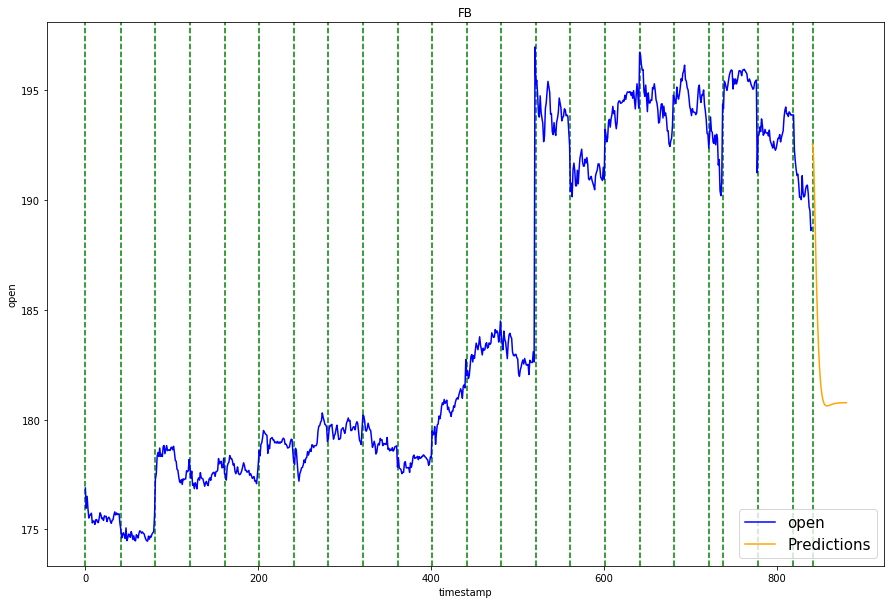

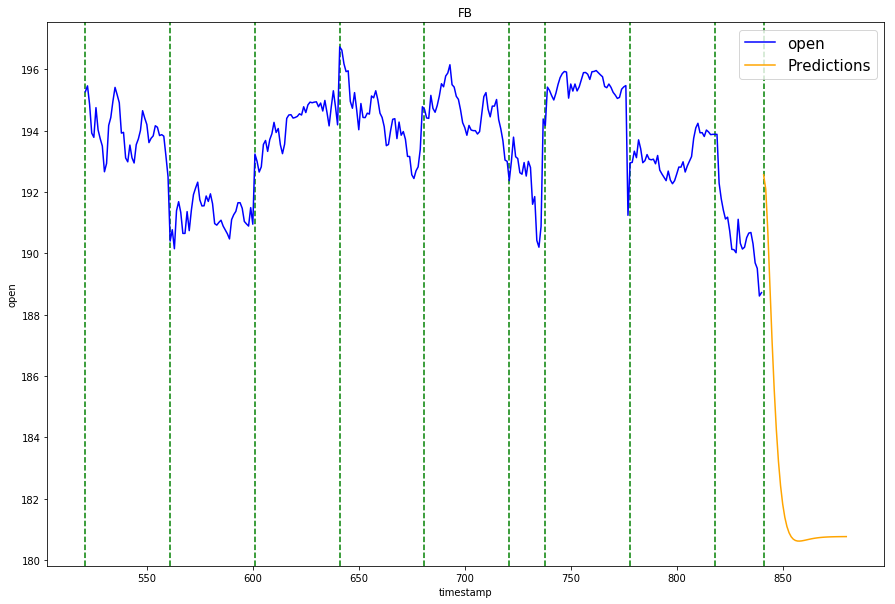

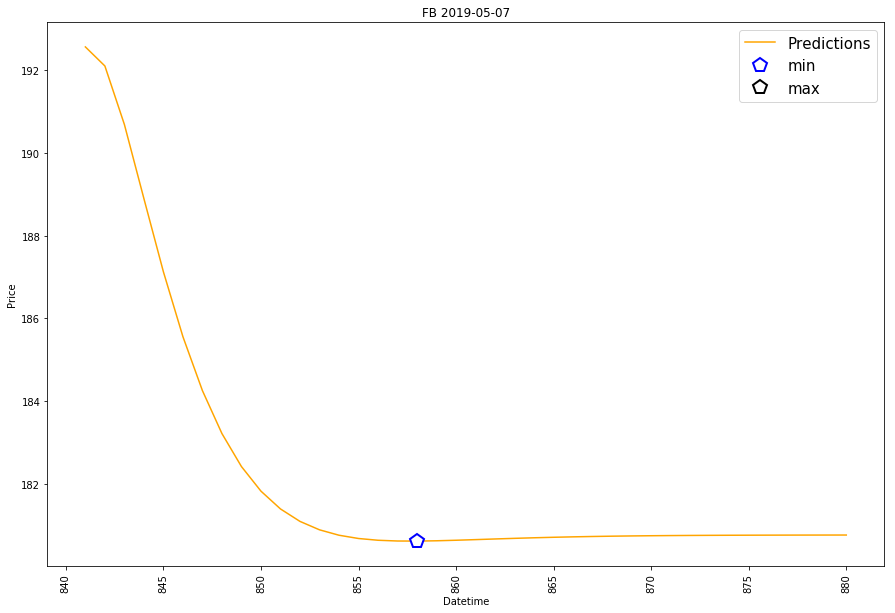

In [12]:
symbol = 'FB'
data_points = ['open','close','low','high','volume']
sensitivity = 25

num_predication_points = 40

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split, num_predication_points) #formatted data, and epoch sensitivity, what to use 


DaySplit:  [0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 721, 738, 778, 818, 841]
841


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/25
766/766 [==============================] - 18s 23ms/step - loss: 0.0499
Epoch 2/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0053
Epoch 3/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0044
Epoch 4/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0042
Epoch 5/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0040
Epoch 6/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0038
Epoch 7/25
766/766 [==============================] - 8s 10ms/step - loss: 0.0038
Epoch 8/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0035
Epoch 9/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0034
Epoch 10/25
766/766 [==============================] - 8s 10ms/step - loss: 0.0035
Epoch 11/25
766/766 [==============================] - 8s 10ms/step - loss: 0.0032
Epoch 12/25
766/766 [==============================] - 7s 10ms/step - loss: 0.0031
Epoch 13/25
766/766

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

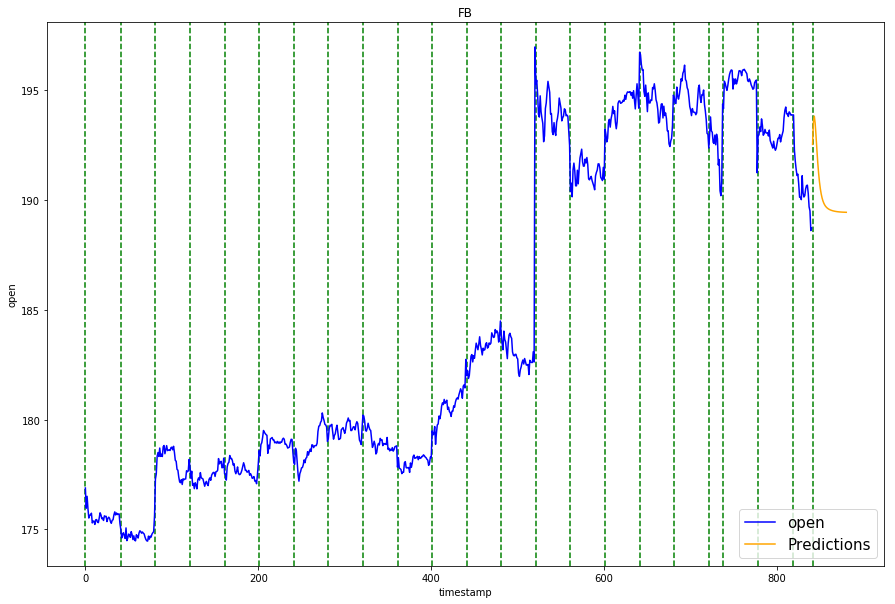

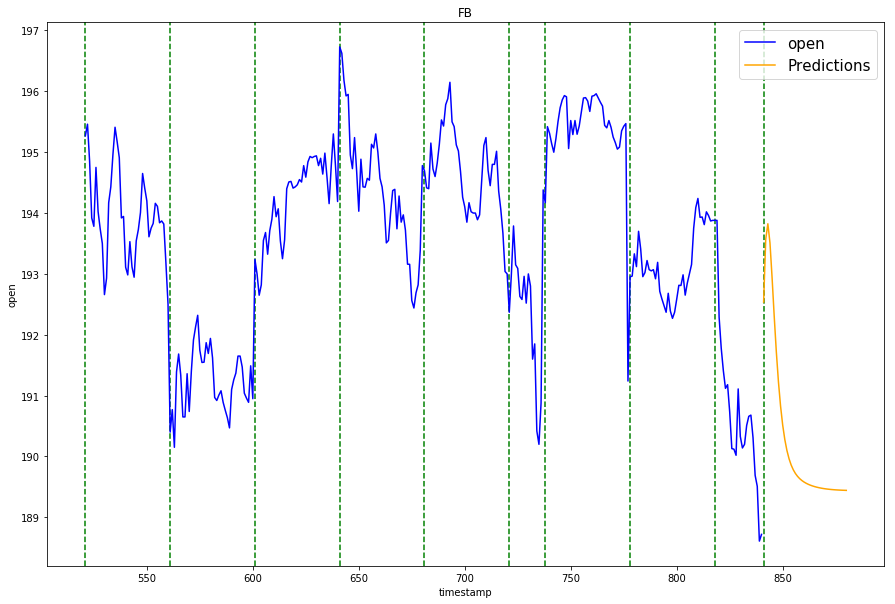

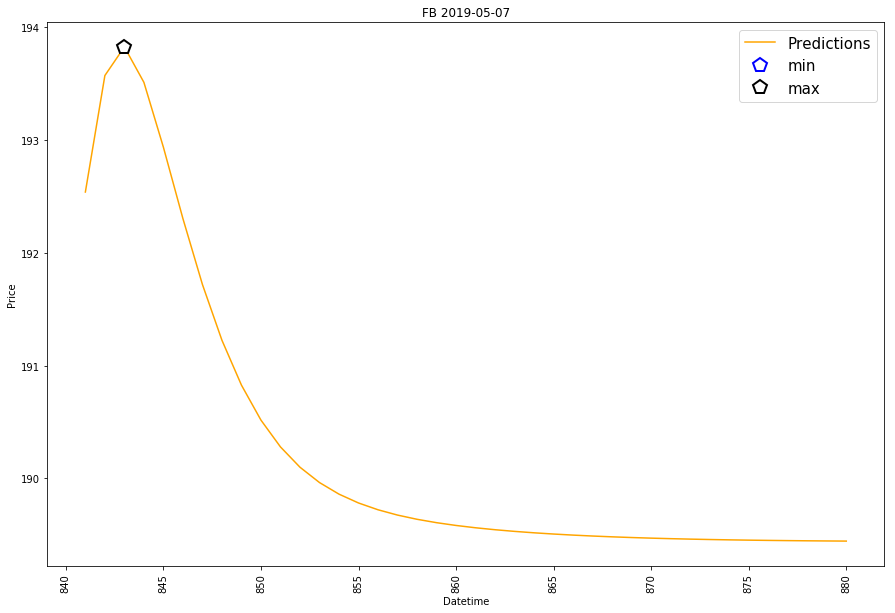

In [13]:
symbol = 'FB'
data_points = ['open','close','low','high','volume']
sensitivity = 25

num_predication_points = 40

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split, num_predication_points) #formatted data, and epoch sensitivity, what to use 


DaySplit:  [0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 721, 738, 778, 818, 841]
841


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/25
766/766 [==============================] - 12s 16ms/step - loss: 0.0523
Epoch 2/25
766/766 [==============================] - 6s 8ms/step - loss: 0.0056
Epoch 3/25
766/766 [==============================] - 6s 8ms/step - loss: 0.0044
Epoch 4/25
766/766 [==============================] - 6s 8ms/step - loss: 0.0042
Epoch 5/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0042
Epoch 6/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0040
Epoch 7/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0039
Epoch 8/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0039
Epoch 9/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0041
Epoch 10/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0035
Epoch 11/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0034
Epoch 12/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0033
Epoch 13/25
766/766 [==

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

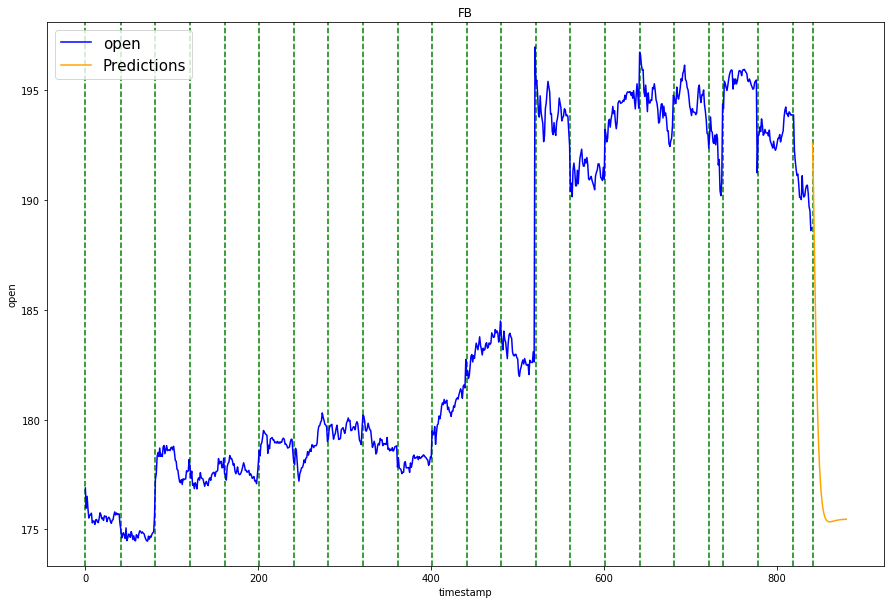

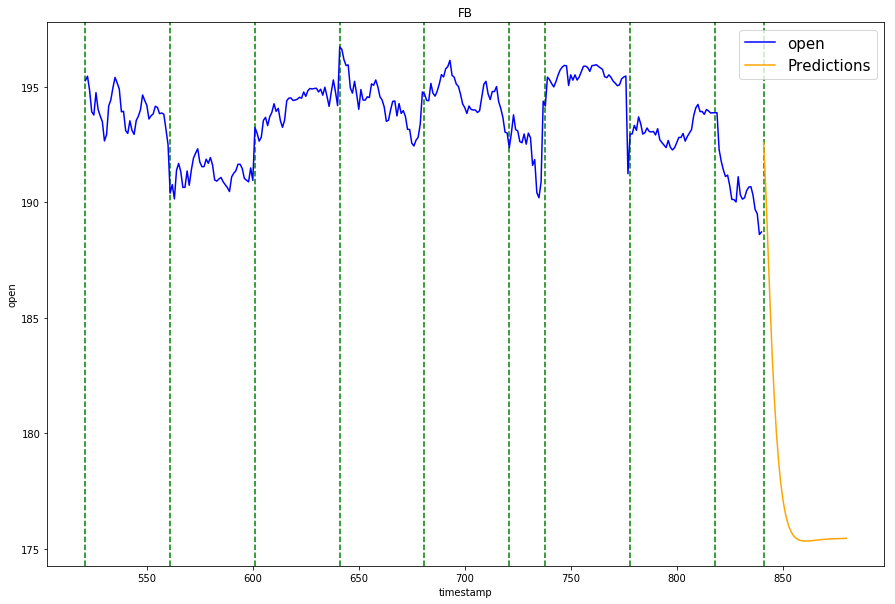

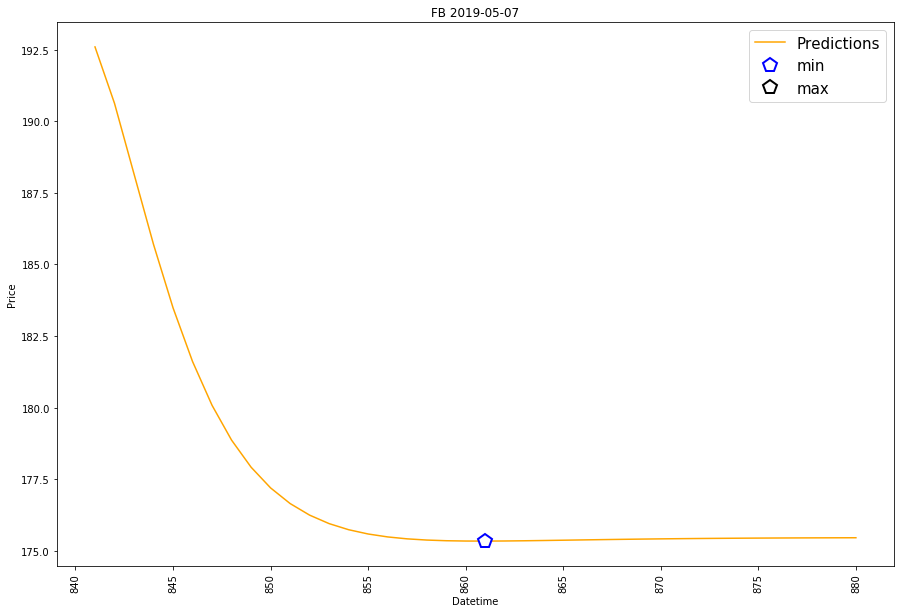

In [14]:
symbol = 'FB'
data_points = ['open','close','low','high','volume']
sensitivity = 25

num_predication_points = 40

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split, num_predication_points) #formatted data, and epoch sensitivity, what to use 


DaySplit:  [0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 721, 738, 778, 818, 841]
841


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/25
766/766 [==============================] - 23s 30ms/step - loss: 0.0586
Epoch 2/25
766/766 [==============================] - 8s 10ms/step - loss: 0.0060
Epoch 3/25
766/766 [==============================] - 8s 10ms/step - loss: 0.0045
Epoch 4/25
766/766 [==============================] - 8s 11ms/step - loss: 0.0039
Epoch 5/25
766/766 [==============================] - 8s 10ms/step - loss: 0.0038
Epoch 6/25
766/766 [==============================] - 8s 10ms/step - loss: 0.0037
Epoch 7/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0036
Epoch 8/25
766/766 [==============================] - 7s 9ms/step - loss: 0.0034
Epoch 9/25
766/766 [==============================] - 8s 10ms/step - loss: 0.0034
Epoch 10/25
766/766 [==============================] - 8s 10ms/step - loss: 0.0033
Epoch 11/25
766/766 [==============================] - 9s 12ms/step - loss: 0.0032
Epoch 12/25
766/766 [==============================] - 9s 12ms/step - loss: 0.0031
Epoch 13/25
76

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

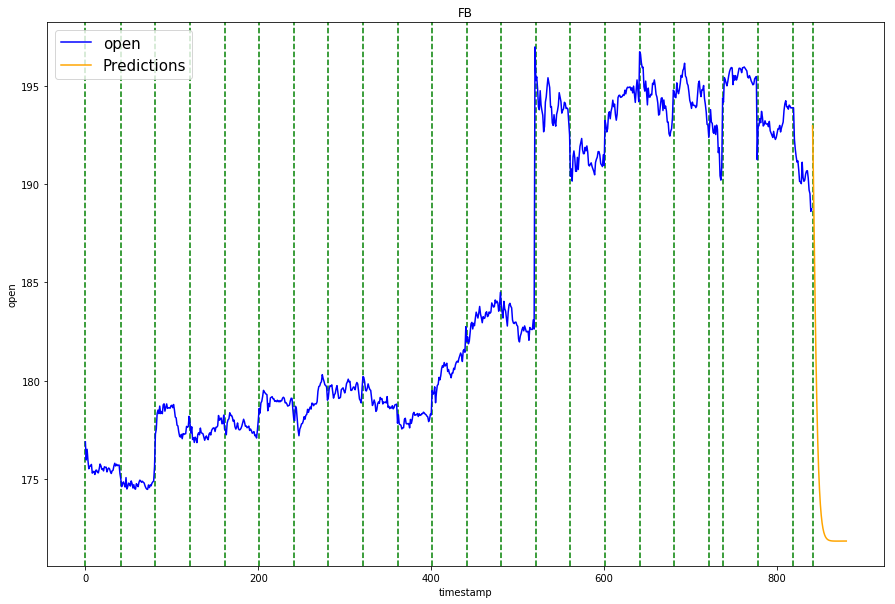

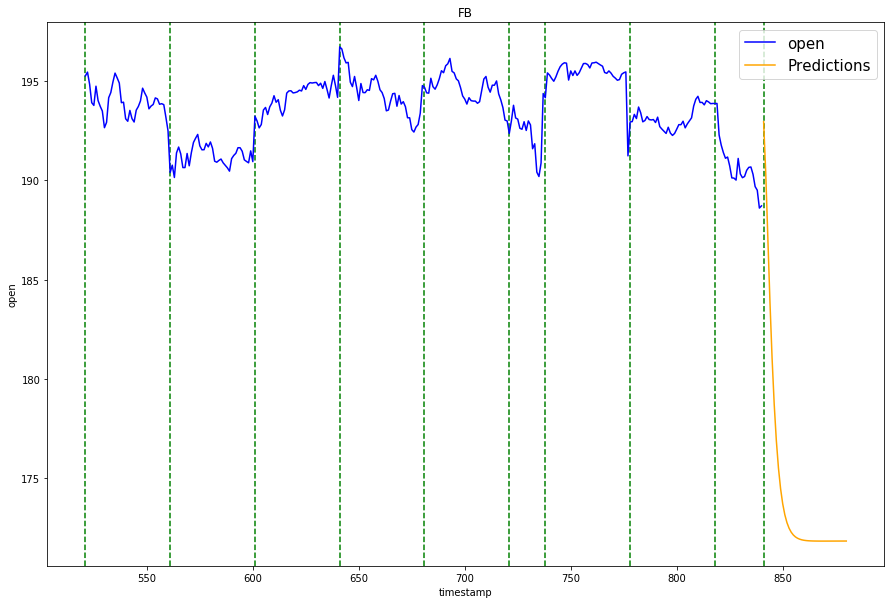

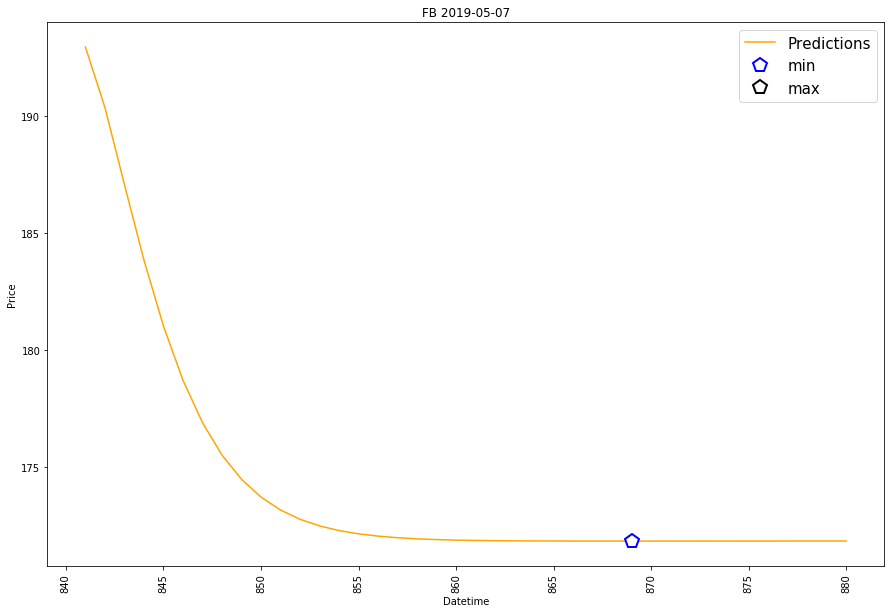

In [15]:
symbol = 'FB'
data_points = ['open','close','low','high','volume']
sensitivity = 25

num_predication_points = 40

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split, num_predication_points) #formatted data, and epoch sensitivity, what to use 
